<a href="https://colab.research.google.com/github/dayananikol/dl_models/blob/main/Copy_of_MODEL1_bentory_wUnknown6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import os

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [3]:
# Set paths
dataset_dir = '/content/drive/MyDrive/bentory_dataset/final_ready_dataset'

# Define image size and batch
IMG_SIZE = 224
BATCH_SIZE = 32

# # Generator with augmentation for training/validation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     validation_split=0.2
# )

# or try with these augmentation,
datagen = ImageDataGenerator(
   rescale=1./255,
   rotation_range=20,             # slight increase
  width_shift_range=0.1,
   height_shift_range=0.1,
  zoom_range=0.2,                # increase zoom randomness
   shear_range=0.1,               # simulate perspective tilt
   brightness_range=[0.8, 1.2],   # simulate lighting changes
   horizontal_flip=True,
   validation_split=0.2,
   fill_mode='nearest'            # handle empty pixels after rotation/shift
)


# Train generator
train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Test generator (no augmentation, no split)
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/bentory_dataset/final_ready_dataset_test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3832 images belonging to 11 classes.
Found 957 images belonging to 11 classes.
Found 550 images belonging to 11 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),


    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model.compile(
#     optimizer=SGD(learning_rate=0.01, momentum=0.9), # Example with learning rate and momentum
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2104 - loss: 2.9354 
Epoch 1: val_loss improved from inf to 0.97266, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 1788s 15s/step - accuracy: 0.2119 - loss: 2.9270 - val_accuracy: 0.7712 - val_loss: 0.9727
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7589 - loss: 0.8193
Epoch 2: val_loss improved from 0.97266 to 0.65551, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 612s 5s/step - accuracy: 0.7591 - loss: 0.8186 - val_accuracy: 0.8161 - val_loss: 0.6555
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8394 - loss: 0.5295
Epoch 3: val_loss improved from 0.65551 to 0.50940, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.8395 - loss: 0.5292 - val_accuracy: 0.8746 - val_loss: 0.5094
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8756 - loss: 0.4170
Epoch 4: val_loss improved from 0.50940 to 0.47834, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 563s 5s/step - accuracy: 0.8757 - loss: 0.4167 - val_accuracy: 0.8892 - val_loss: 0.4783
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8925 - loss: 0.3609
Epoch 5: val_loss improved from 0.47834 to 0.47274, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.8925 - loss: 0.3610 - val_accuracy: 0.8809 - val_loss: 0.4727
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9119 - loss: 0.2865
Epoch 6: val_loss improved from 0.47274 to 0.43755, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 605s 5s/step - accuracy: 0.9120 - loss: 0.2864 - val_accuracy: 0.8861 - val_loss: 0.4375
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9185 - loss: 0.2590
Epoch 7: val_loss improved from 0.43755 to 0.38765, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 572s 5s/step - accuracy: 0.9185 - loss: 0.2592 - val_accuracy: 0.8913 - val_loss: 0.3876
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9267 - loss: 0.2724
Epoch 8: val_loss did not improve from 0.38765
120/120 ━━━━━━━━━━━━━━━━━━━━ 611s 5s/step - accuracy: 0.9268 - loss: 0.2720 - val_accuracy: 0.8871 - val_loss: 0.4299
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9374 - loss: 0.2013
Epoch 9: val_loss improved from 0.38765 to 0.38070, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 560s 5s/step - accuracy: 0.9374 - loss: 0.2014 - val_accuracy: 0.8851 - val_loss: 0.3807
Epoch 10/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9496 - loss: 0.1741
Epoch 10: val_loss improved from 0.38070 to 0.36677, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 597s 5s/step - accuracy: 0.9496 - loss: 0.1741 - val_accuracy: 0.8955 - val_loss: 0.3668
Epoch 11/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9411 - loss: 0.2224
Epoch 11: val_loss did not improve from 0.36677
120/120 ━━━━━━━━━━━━━━━━━━━━ 565s 5s/step - accuracy: 0.9412 - loss: 0.2222 - val_accuracy: 0.8892 - val_loss: 0.3701
Epoch 12/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9596 - loss: 0.1588
Epoch 12: val_loss did not improve from 0.36677
120/120 ━━━━━━━━━━━━━━━━━━━━ 564s 5s/step - accuracy: 0.9595 - loss: 0.1589 - val_accuracy: 0.8966 - val_loss: 0.4035
Epoch 13/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9478 - loss: 0.1728
Epoch 13: val_loss improved from 0.36677 to 0.29610, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 557s 5s/step - accuracy: 0.9478 - loss: 0.1728 - val_accuracy: 0.9206 - val_loss: 0.2961
Epoch 14/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9627 - loss: 0.1460
Epoch 14: val_loss did not improve from 0.29610
120/120 ━━━━━━━━━━━━━━━━━━━━ 564s 5s/step - accuracy: 0.9627 - loss: 0.1461 - val_accuracy: 0.9185 - val_loss: 0.3197
Epoch 15/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9562 - loss: 0.1752
Epoch 15: val_loss did not improve from 0.29610
120/120 ━━━━━━━━━━━━━━━━━━━━ 553s 5s/step - accuracy: 0.9562 - loss: 0.1751 - val_accuracy: 0.9133 - val_loss: 0.3244


In [6]:
loss, accuracy = model.evaluate(test_gen)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 251s 15s/step - accuracy: 0.9823 - loss: 0.0657
Test Loss: 0.12426646798849106
Test Accuracy: 0.9618181586265564


In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Evaluate the model
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step
Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       0.98      1.00      0.99        50
                     C2       0.91      1.00      0.95        50
         Datu Puti Suka       0.98      1.00      0.99        50
         Datu Puti Toyo       0.98      1.00      0.99        50
                   Ligo       1.00      1.00      1.00        50
            Magic Sarap       0.96      0.86      0.91        50
Pancit Canton Kalamansi       0.98      1.00      0.99        50
              Safeguard       1.00      1.00      1.00        50
            Surf Powder       1.00      0.94      0.97        50
                Unknown       1.00      0.80      0.89        50
                  V Cut       0.83      0.98      0.90        50

               accuracy                           0.96       550
              macro avg       0.97      0.96      0.96       550
           weighted avg   

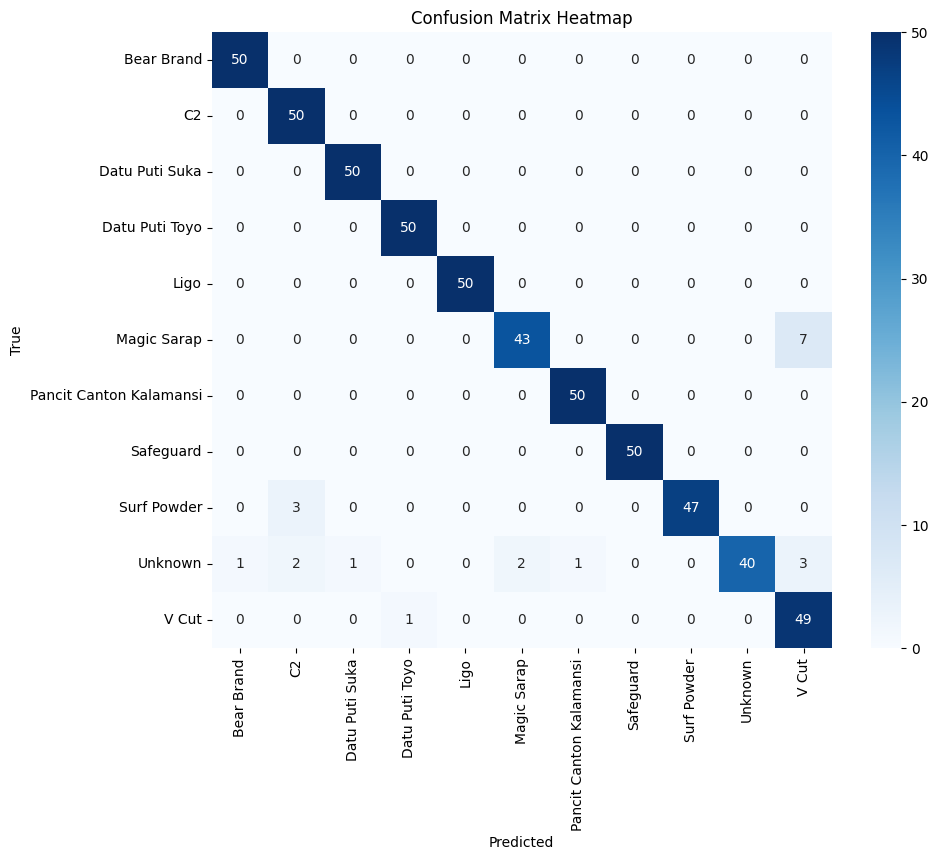

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Use the true_classes and predicted_classes calculated earlier
true_labels = true_classes
pred_labels = predicted_classes

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
class_names = list(test_gen.class_indices.keys()) # Use class names from test_gen

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

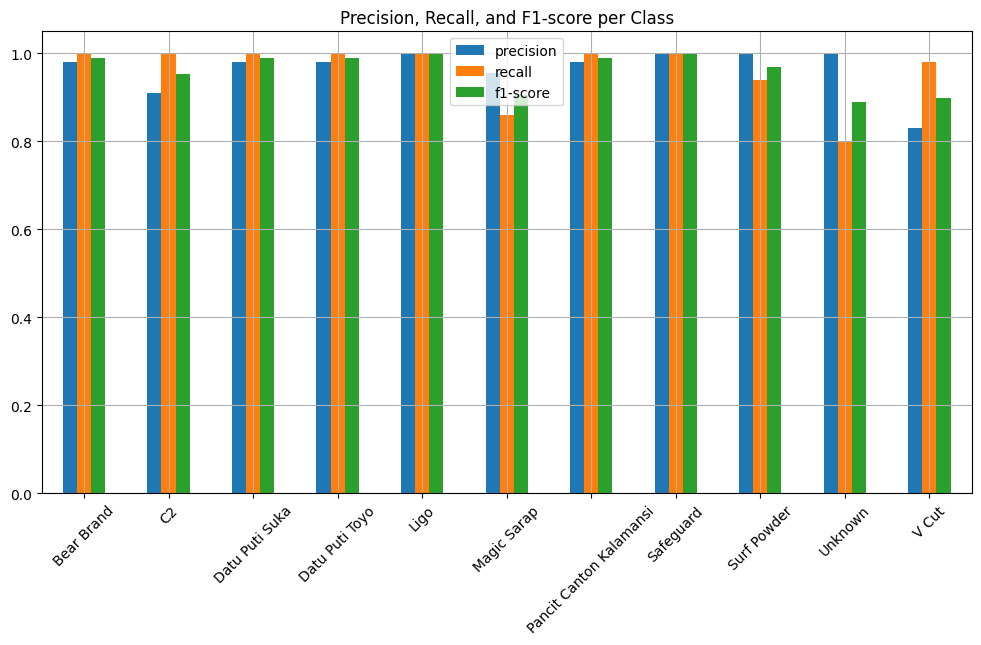

In [9]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as dictionary
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot
df_report.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Precision, Recall, and F1-score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


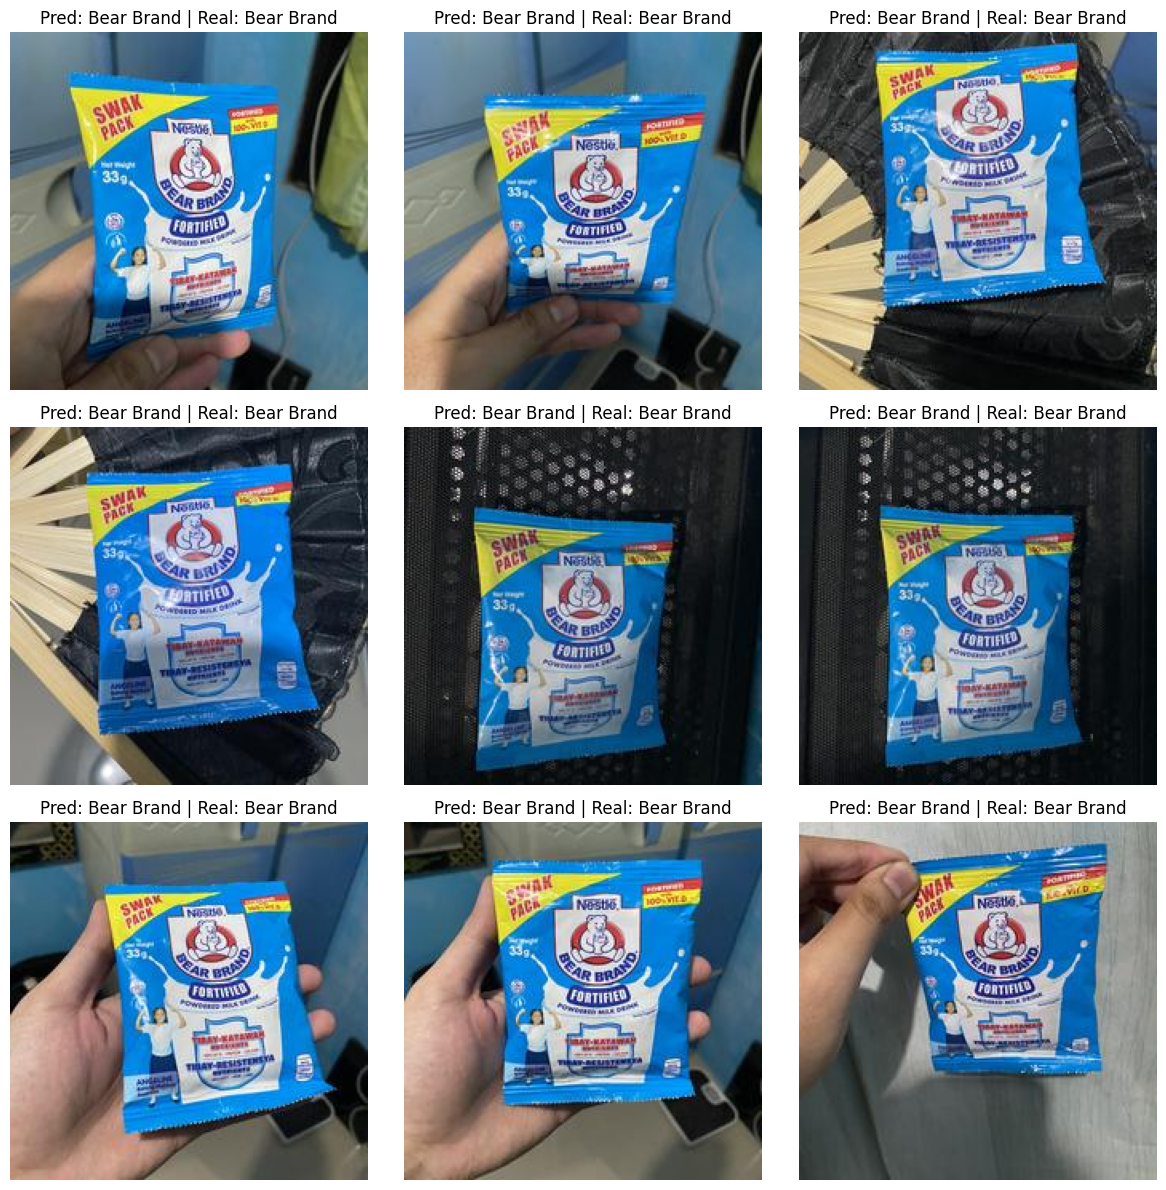

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels from the test generator
images, labels = next(test_gen)

# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

# Select the first 9 images and their true labels
num_images_to_show = 9
selected_images = images[:num_images_to_show]
selected_labels = labels[:num_images_to_show]

# Determine the true class names for the selected labels
true_class_names = [class_names[np.argmax(label)] for label in selected_labels]

# Get predictions for the selected images
predictions = model.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[predicted_class] for predicted_class in predicted_classes]

# Plot the images
plt.figure(figsize=(12, 12))
for i in range(num_images_to_show):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f"Pred: {predicted_class_names[i]} | Real: {true_class_names[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [11]:
import tensorflow as tf

h5_model_path = 'best_model.h5'

model = tf.keras.models.load_model(h5_model_path)

    # Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

drive_save_path = '/content/drive/MyDrive/bentory_dataset//best_model.tflite' # <--- Change 'your_model_folder'

# Save the TensorFlow Lite model to a file
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

# import tensorflow as tf
# import os

# # Path to your trained .h5 model file
# h5_model_path = 'best_model.h5'

# # Load the model from the .h5 file
# model = tf.keras.models.load_model(h5_model_path)

# # Define a directory to save the model in the SavedModel format
# saved_model_dir = 'saved_model_directory'

# # Save the model in the SavedModel format using model.export()
# # This is the correct method for exporting to the SavedModel format
# model.export(saved_model_dir)

# # Now use the directory path with the TFLiteConverter
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# # Optional: Apply optimization (reduce size)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # Convert the model
# tflite_model = converter.convert()

# # Save to file
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

# print("✅ Model successfully converted to model.tflite")

Saved artifact at '/tmp/tmpdrjbdogq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  135762656610640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656612368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656610064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656613712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656611792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656614864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656614672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656616784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656615632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656617744: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [12]:
h5_model_path = 'best_model.h5'

model = tf.keras.models.load_model(h5_model_path)

    # Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

drive_save_path = '/content/drive/MyDrive/bentory_dataset/best_model.tflite' # <--- Change 'your_model_folder'

# Save the TensorFlow Lite model to a file
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpy8u8kssi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  135762811708688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762811709456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656624272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656619856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762656616208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762650842896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762650841168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762650844240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762650843280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135762650845392: TensorSpec(shape=(), dtype=tf.resource, name=None)


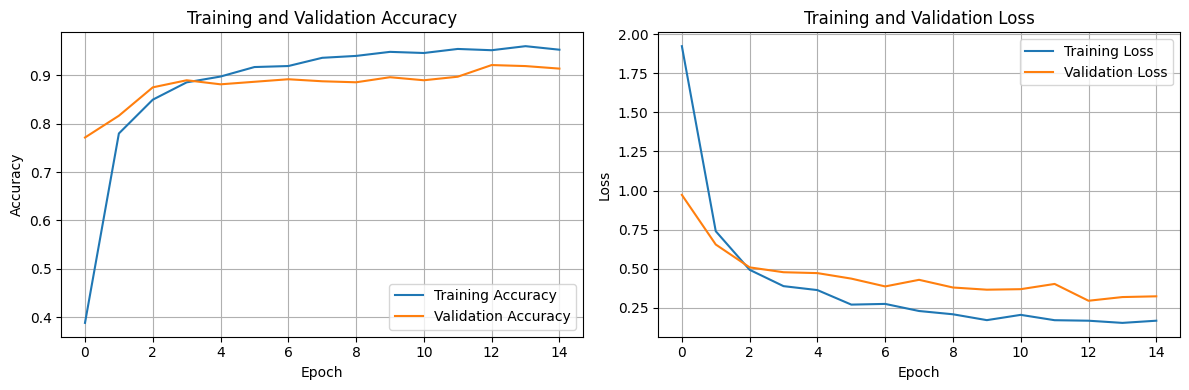

In [13]:
import matplotlib.pyplot as plt

# Get the history from the training
# Assuming 'history' or 'history_continued' contains the training history
# If you ran the last cell, use history_continued, otherwise use history
# Let's use 'history' for now, assuming the last run didn't complete fully.
# If you successfully ran the cell to continue training, change 'history' to 'history_continued'
training_history = history

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()